In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main
import pysindy as psd
from SINDy import SINDy_Train
from utilis_2D import params

In [2]:
total_sim_step = params['total_sim_step']
control_interval = params['control_interval']
burnin_step = params['burnin_step']
burnin_control_step = int(burnin_step/control_interval) # calculate the control step that are within the burnin period

In [3]:
flow_all, _, occupancy_all, flow_dt, _, occupancy_dt = data_loader_main(csv_dict='Sim_Results/Ramp_MPC')

In [4]:
control_input = pd.read_csv('Results/Meter_Rate_MPC.csv')
control_input = control_input/10

In [5]:
burnin_control_step

15

In [6]:
occupancy_all, occupancy_dt = occupancy_all.iloc[burnin_control_step:, :], occupancy_dt.iloc[burnin_control_step:, :]
control_input = control_input.iloc[burnin_control_step:, :]

occupancy_all, occupancy_dt = occupancy_all.iloc[:-1, :].reset_index(drop=True), occupancy_dt.iloc[:-1, :].reset_index(drop=True)
control_input = control_input.iloc[1:,:].reset_index(drop=True)

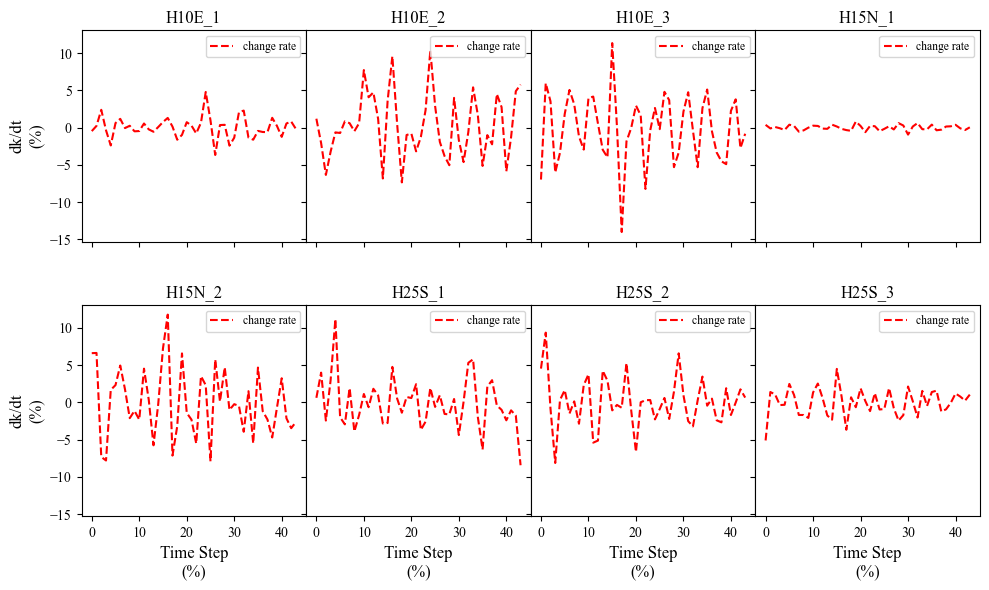

In [7]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        axs[row, col].plot(occupancy_dt.iloc[:, index], "--", label = 'change rate', color = "red")
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].set_title(occupancy_all.columns[index], fontsize=12)

for col in range(4):
    axs[1,col].set_xlabel('Time Step\n(%)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('dk/dt\n(%)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.show()
#fig.savefig('Figures/Flow_val.png', dpi=300)

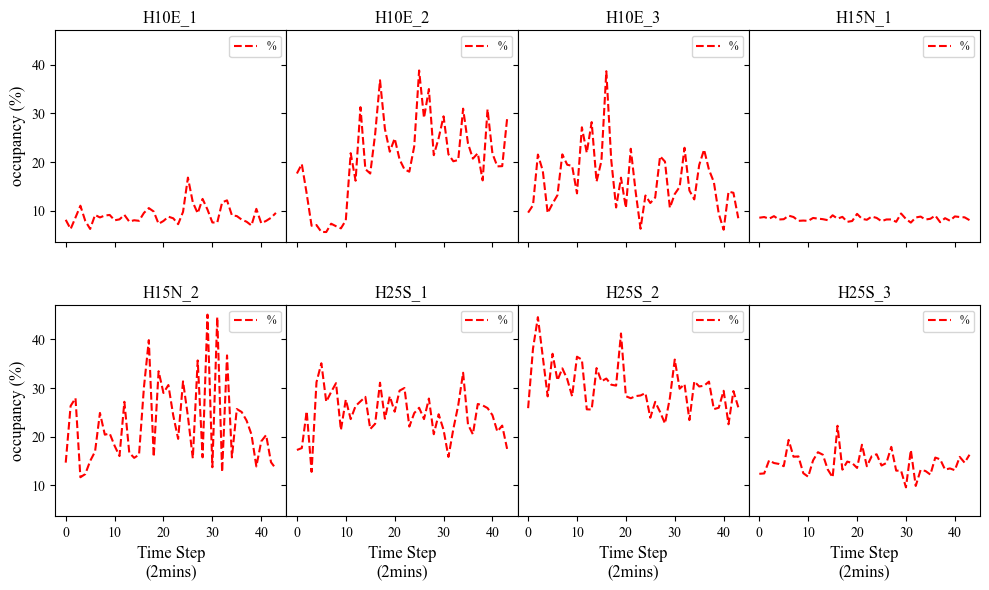

In [8]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        axs[row, col].plot(occupancy_all.iloc[:, index], "--", label = '%', color = "red")
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].set_title(flow_all.columns[index], fontsize=12)

for col in range(4):
    axs[1,col].set_xlabel('Time Step\n(2mins)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('occupancy (%)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.show()

## SINDY

In [9]:
model = SINDy_Train(x = occupancy_all, dx = occupancy_dt, u = control_input, threshold= 0.001)

In [10]:
model.print()

(x0)' = 0.001 x1 + 0.001 x5 + 0.008 u0 + 0.006 u2 + 0.002 u3 + 0.001 u4 + 0.007 x0 x4 + 0.003 x0 x5 + 0.003 x0 x6 + -0.003 x0 u1 + -0.012 x0 u2 + 0.017 x0 u4 + -0.002 x0 u5 + 0.012 x1^2 + -0.015 x1 x2 + 0.002 x1 x3 + 0.010 x1 x4 + 0.017 x1 x5 + -0.001 x1 u0 + -0.012 x1 u1 + 0.001 x1 u2 + -0.012 x1 u4 + -0.004 x1 u5 + -0.013 x2^2 + -0.010 x2 x4 + -0.023 x2 x5 + -0.004 x2 x7 + 0.005 x2 u0 + -0.005 x2 u1 + 0.007 x2 u2 + 0.007 x2 u3 + 0.002 x2 u4 + 0.004 x2 u5 + -0.004 x3 x4 + -0.005 x3 x6 + -0.002 x3 x7 + 0.005 x3 u0 + 0.008 x3 u2 + 0.006 x3 u4 + -0.031 x4 x5 + -0.016 x4 x6 + 0.009 x4 x7 + 0.008 x4 u0 + -0.010 x4 u1 + -0.002 x4 u2 + 0.006 x4 u3 + -0.006 x4 u5 + -0.021 x5^2 + 0.005 x5 x6 + 0.010 x5 x7 + 0.018 x5 u0 + -0.007 x5 u1 + -0.008 x5 u2 + -0.018 x5 u3 + -0.016 x5 u4 + 0.004 x5 u5 + 0.002 x6 u0 + 0.014 x6 u1 + 0.005 x6 u3 + -0.007 x6 u4 + -0.007 x6 u5 + 0.003 x7 u1 + -0.005 x7 u2 + 0.011 x7 u4 + -0.004 x7 u5 + -0.002 u0^2 + -0.010 u0 u1 + -0.004 u0 u3 + 0.010 u0 u5 + 0.005 u1^2 + 0.

In [11]:
# Predict derivatives using the learned model
occupancy_dt_pred = model.predict(occupancy_all, u=control_input)
# flow_dt_pred = model.predict(flow_all, u=control_input)

In [12]:
# occupancy_dt = occupancy_dt.reset_index(drop=True)

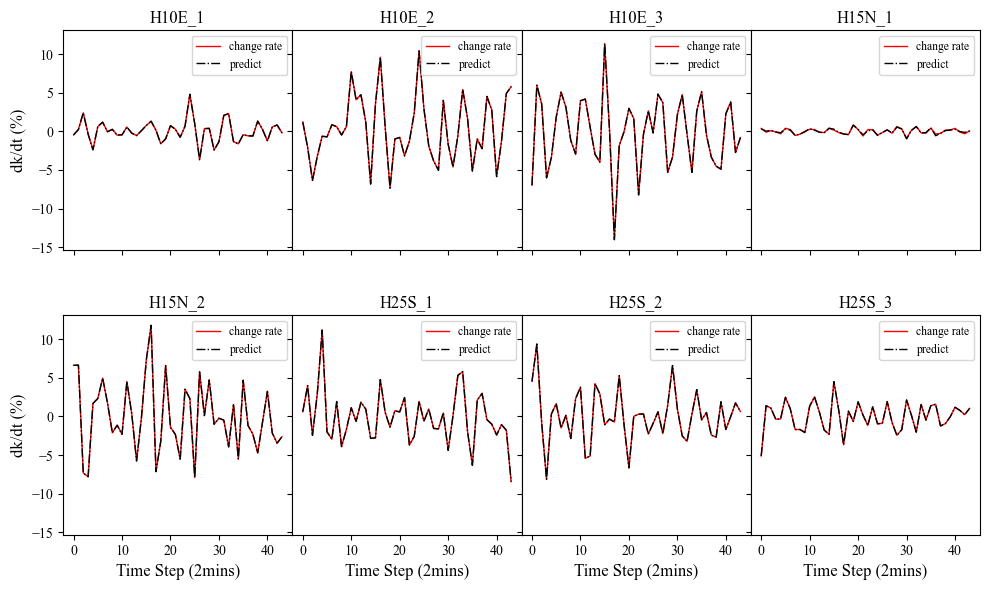

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        axs[row, col].plot(occupancy_dt.iloc[:, index], "-", label = 'change rate', color = "red",linewidth=1)
        axs[row, col].plot(occupancy_dt_pred[:, index], "-.", label = 'predict', color = "black", linewidth=1)
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].set_title(flow_all.columns[index], fontsize=12)
        # axs[row, col].set_ylim([-50, 50])

for col in range(4):
    axs[1,col].set_xlabel('Time Step (2mins)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('dk/dt (%)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/SINDy_Predict.png', dpi=300)